In [161]:
import numpy as np
import matplotlib.pyplot as plt

In [162]:
A = 1.0
F1 = 50
F2 = 150
F3 = 450
N0 = 1000
START = 0.0
END = 1.0

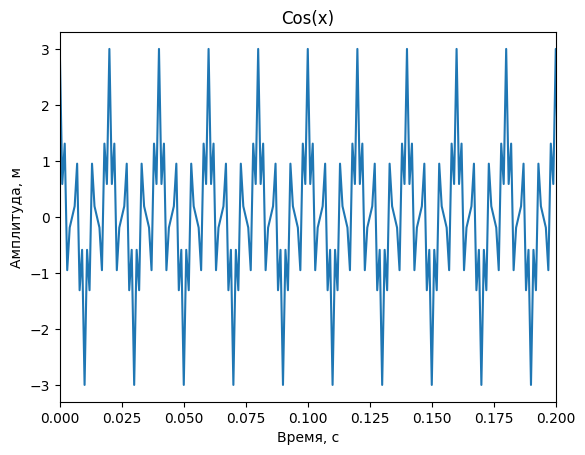

In [163]:
# Функция нахождения циклической частоты через частоту
def cyclic_frequency_(f):
    return 2 * np.pi * f

# Функция косинуса
def func_1(x, f, A):
    return A * np.cos(cyclic_frequency_(f) * x)

X = np.linspace(START, END, N0, endpoint = False)
y1 = np.array([func_1(t, F1, A) for t in X])
y2 = np.array([func_1(t, F2, A) for t in X])
y3 = np.array([func_1(t, F3, A) for t in X])
Y = y1 + y2  + y3


plt.xlim(0, 0.2)
plt.xlabel('Время, с')
plt.ylabel('Амплитуда, м')
plt.title('Cos(x)')
plt.plot(X, Y)
plt.show()


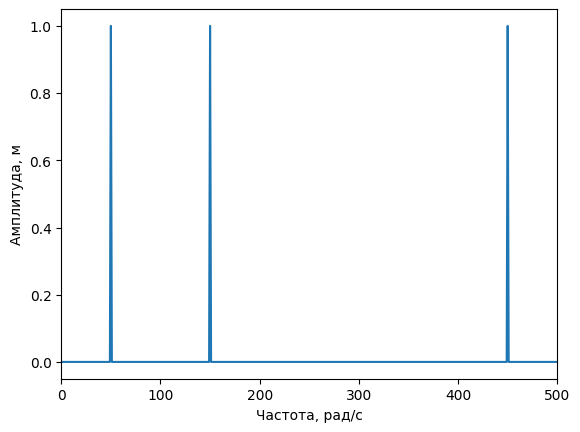

In [164]:
# Нахождение спектра сигнала
def spectrum(x, y) :
    xff = np.arange(len(x))
    yff = np.fft.fft(y) / len(x)
    return xff, yff 

xf1, yf1 = spectrum(X, Y)
plt.xlabel('Частота, рад/с')
plt.ylabel('Амплитуда, м')
plt.plot(xf1, 2 * A * yf1)
plt.xlim(0, F3+50)
plt.show()

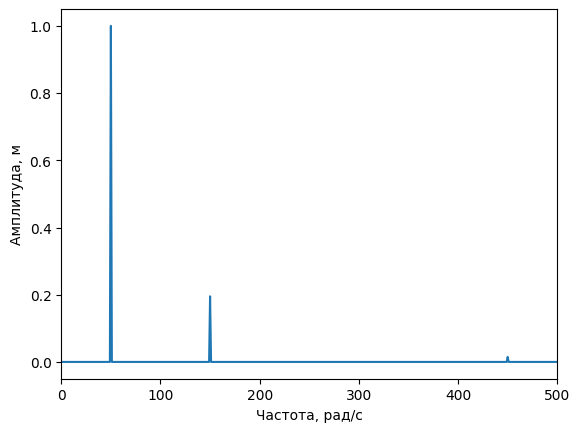

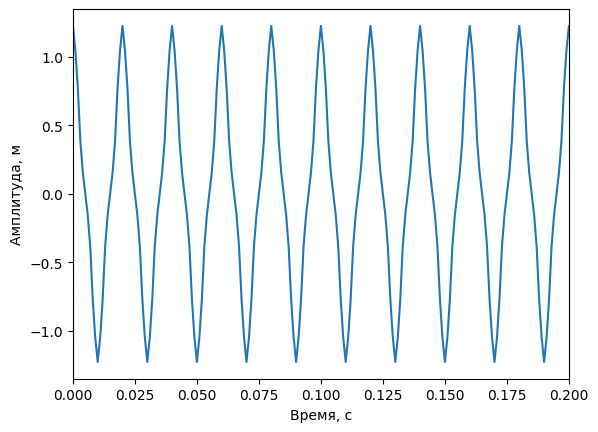

In [165]:
def buttervot_fdw(w, wc):
    return (wc**2 / ((1j*w - wc*np.exp(1j*np.pi/4))*(1j*w - wc*np.exp(1j*np.pi/4*3))))

def FDW(x, y, wc):
    return np.abs([y[t] * buttervot_fdw(t, wc) for t in x])


ydw = FDW(xf1, yf1, 70)
plt.xlabel('Частота, рад/с')
plt.ylabel('Амплитуда, м')
plt.plot(xf1, A * ydw)
plt.xlim(0, F3+50)
plt.show()

ydw = np.fft.ifft(ydw * len(xf1))
plt.xlabel('Время, с')
plt.ylabel('Амплитуда, м')
plt.plot(X, A * ydw)
plt.xlim(0,0.2)
plt.show()

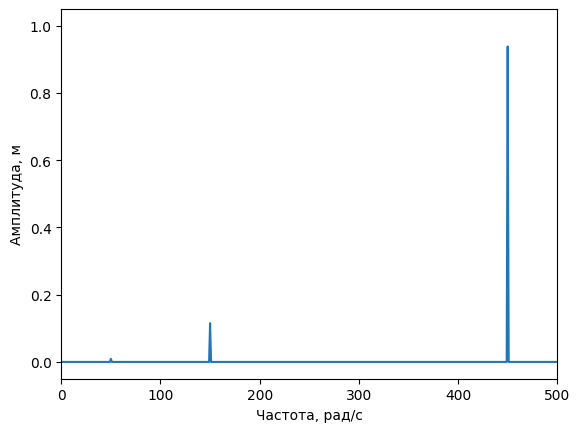

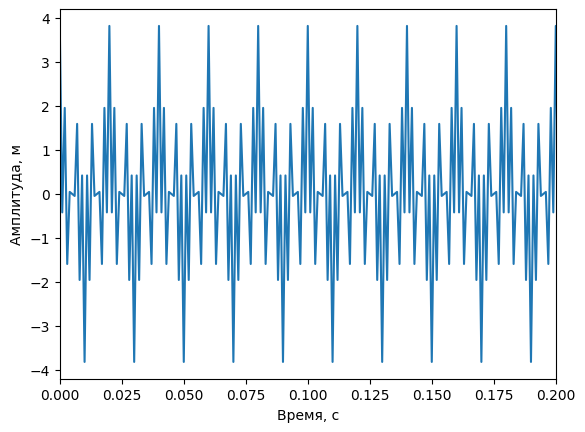

In [166]:
def buttervot_fuw(w, wc):
    return (w**2 * 1j/ ((1j*w - wc*np.exp(1j*np.pi/4))*(1j*w - wc*np.exp(1j*np.pi/4*3))))
    # return buttervot_fdw(wc, w)

def FUW(x, y, wc):
    return np.abs([y[t] * buttervot_fuw(t, wc) for t in x])

yuw = FUW(xf1, yf1, 400)
plt.xlabel('Частота, рад/с')
plt.ylabel('Амплитуда, м')
plt.plot(xf1, A * yuw)
plt.xlim(0, F3+50)
plt.show()

yuw = np.fft.ifft(yuw * len(xf1))
plt.xlabel('Время, с')
plt.ylabel('Амплитуда, м')
plt.plot(X, A * yuw)
plt.xlim(0,0.2)
plt.show()

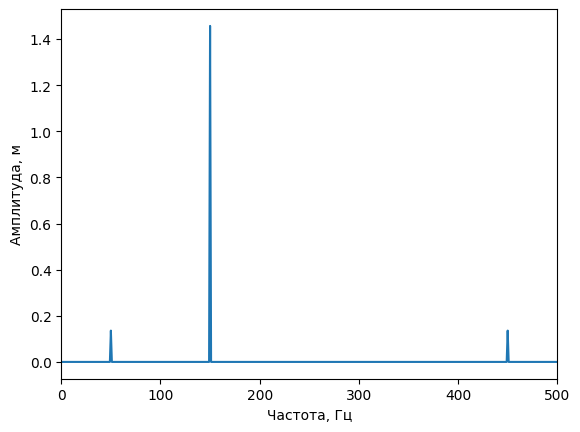

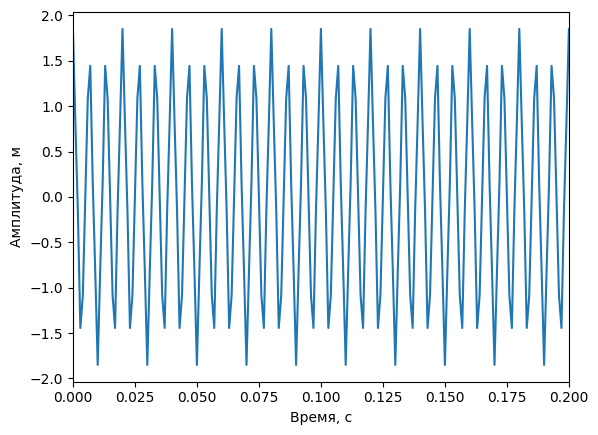

In [167]:
def band_pass_filter(w, wc):
    return buttervot_fuw(w, wc) * buttervot_fdw(w, wc)
    # return buttervot_fdw(w * wc, (wc**2 + w**2))

def BF(x, y, wc):
    return np.abs([y[t] * band_pass_filter(t, wc) for t in x])

ybf = BF(xf1, yf1, 150)
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда, м')
plt.plot(xf1, A * ybf)
plt.xlim(0, F3+50)
plt.show()

ybf = np.fft.ifft(ybf * len(xf1))
plt.xlabel('Время, с')
plt.ylabel('Амплитуда, м')
plt.plot(X, A * ybf)
plt.xlim(0, 0.2)
plt.show()

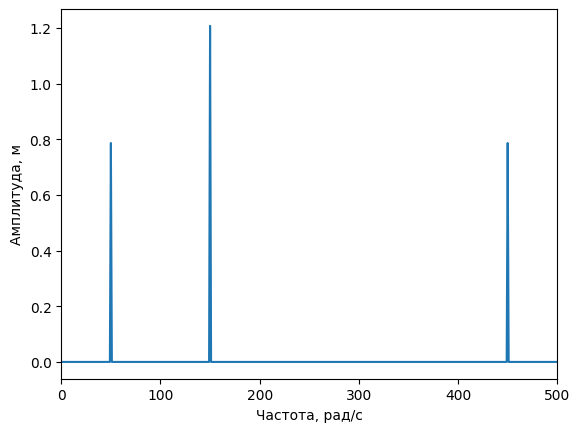

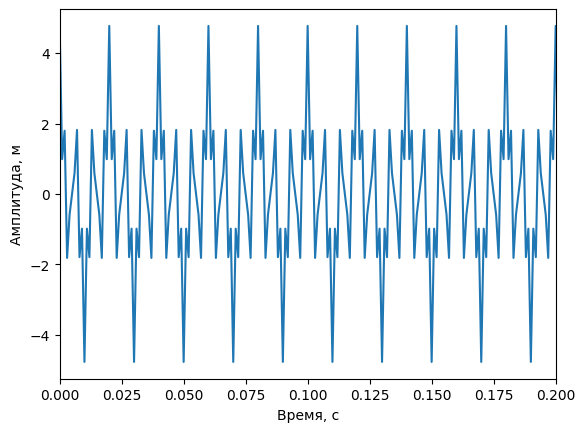

In [168]:
def closing_filter(w, wc):
    return buttervot_fuw(w, wc) + buttervot_fdw(w, wc)
    # return buttervot_fdw(w * 2 * wc, (wc**2 + np.sqrt(2) * w**2))

def CF(x, y, wc):
    return np.abs([y[t] * closing_filter(t, wc) for t in x])

ycf = CF(xf1, yf1, 150)
plt.xlabel('Частота, рад/с')
plt.ylabel('Амплитуда, м')
plt.plot(xf1, A * ycf)
plt.xlim(0, F3+50)
plt.show()

ycf = np.fft.ifft(ycf * len(xf1))
plt.xlabel('Время, с')
plt.ylabel('Амплитуда, м')
plt.plot(X, A * ycf)
plt.xlim(0, 0.2)
plt.show()